In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.0MB 5.0MB/s 
  Found existing installation: tensorflow-datasets 1.3.0
    Uninstalling tensorflow-datasets-1.3.0:
      Successfully uninstalled tensorflow-datasets-1.3.0


In [0]:
from __future__ import division, unicode_literals, absolute_import, print_function

In [2]:
try:
  #use %tensorflow 2.x magic when in colab
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Import Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

def normalize(images, labels):
  images=tf.cast(images, tf.float32)
  images/=255
  return images, labels

# The map function applies the normalize function to every element in the train and test data set
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

Number of training examples: 60000
Number of test examples:     10000


In [0]:
train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

In [0]:
# Take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))

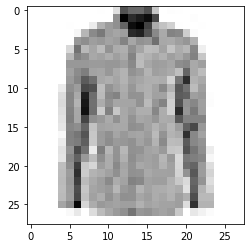

In [10]:
# Plot the image - voila !! a piece of clothing *_*
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar
plt.grid(False)
plt.show()

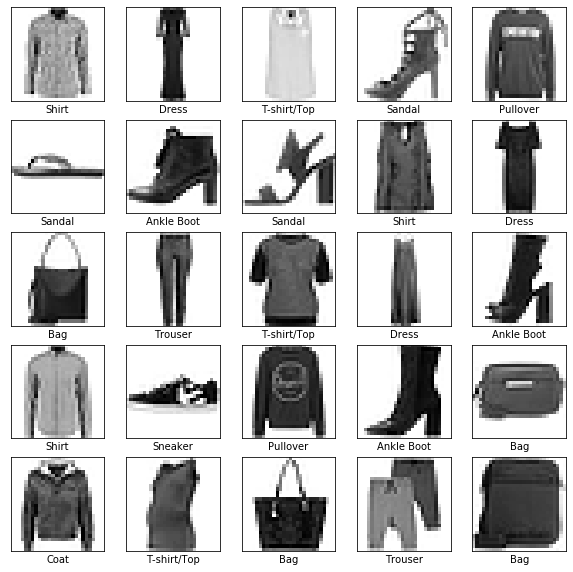

In [11]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                           tf.keras.layers.Dense(128, activation=tf.nn.relu),
                           tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                           ])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4857 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3313 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8918


In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset : ', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3572 - accuracy: 0.8730
Accuracy on test dataset :  0.873


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([1.34030721e-04, 4.30134079e-08, 2.57421960e-03, 3.51981289e-05,
       1.15397945e-01, 2.06445527e-08, 8.81798506e-01, 2.22801208e-10,
       6.01566571e-05, 3.37164807e-09], dtype=float32)

In [20]:
np.argmax(predictions[0])

6

In [21]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

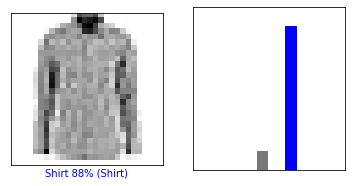

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

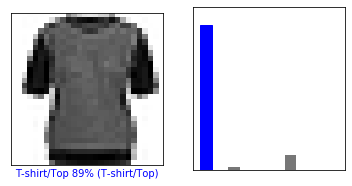

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

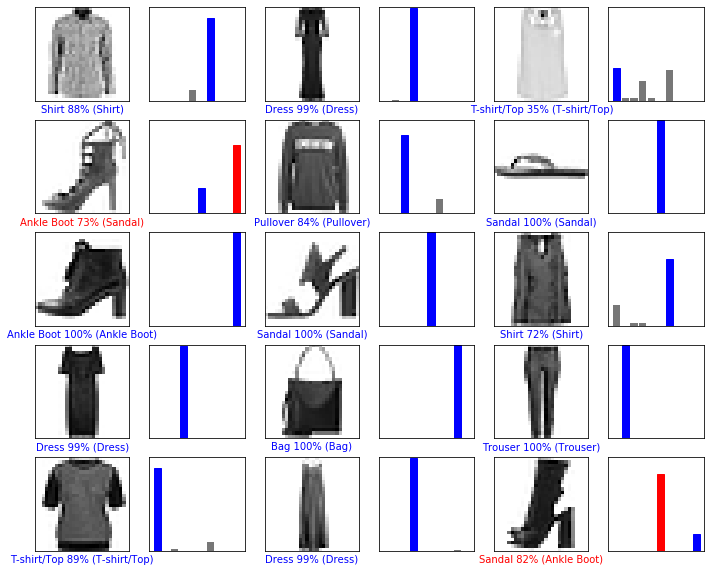

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [26]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [27]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3403058e-04 4.3013319e-08 2.5742217e-03 3.5198089e-05 1.1539800e-01
  2.0644631e-08 8.8179839e-01 2.2280162e-10 6.0156533e-05 3.3716476e-09]]


6

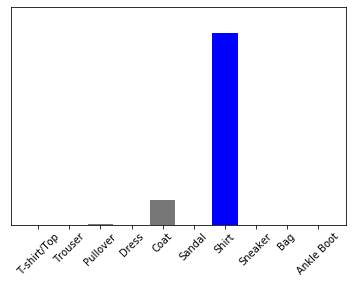

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])